本章介紹線性迴歸模型，會討論兩種全然相異的訓練方法
- 直接使用封閉式方程式，算出可讓模型最擬合訓練組（也就是可將訓練組的代價函數最小化）的模型參數
- 使用稱為梯度下降（Gradient Descent，GD）的迭代式優化法，逐步調整模型參數，來將訓練組的代價函數最小化，最終收斂到與第一種一樣的參數

另外還有多項式回歸，可擬合非線性資料組

# 線性回歸

線性迴歸進行預測的方式，是計算輸入特徵的加權總和，再加上一個稱為*偏差值*(也稱為截距項)的常數

線性回歸模型預測：

$\hat{y} = \theta_0 + \theta_1x_1+\theta_2x_2+....+\theta_nx_n$

- $\hat{y}$是預測出來的值
- $n$是特徵數量
- $x_i$是第$i$個特徵的值
- $\theta_j$是第$j$個模型參數（包括偏差項$\theta_0$與特徵權重$\theta_1,\theta_2,...,\theta_n$）

線性迴歸模型預測（向量化的形式）：

$\hat{y} = h_\theta(x) = \theta \cdot x$

- $\theta$是模型的**參數向量**，裡面有偏差項$\theta_0$與特徵權重$\theta_1$到$\theta_n$
- $x$ 是實力的**特徵向量**，裡面有$x_0$到$x_n$，$x_0$一定等於1
- $\theta \cdot x$是向量$\theta$與$x$的內積，等於$\theta_0 + \theta_1x_1+\theta_2x_2+....+\theta_nx_n$
- $h_\theta$是假設函數，使用模型參數$\theta$

在機器學習中，向量通常被稱為行（column）向量，是個有一個欄位的 2D 陣列。如果 $\theta$ 與 $x$ 是行向量，預測值是 $\hat{y} = \theta^T$，其中 $\theta^T$ 是 $\theta$ 的轉置（列向量，而非行向量），而 $\theta^Tx$ 是 $\theta^T$ 與 $x$ 的矩陣相乘

訓練模型代表設定它的參數，讓模型最擬合訓練組

最常見的回歸模型績效評量標準是均方根誤差（RMSE），因此要訓練線性回歸模型，要先找到可將 RMSE 最小化的 $\theta$ 值

Root Mean Square Error (RMSE)

$ RMSE(X, h) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(h(x^{(i)}) - y^{(i)})^2} $

實務上，與 RMSE 相較之下，將均方誤差（MSE）最小化不但簡單，也可產生相同結果（因為能將函數最小化的值，也可將函數的平方根最小化）

線性回歸模型的 MES 代價函數  
Mean Square Error (MSE)

$ MSE(X, h_\theta) = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(\theta^Tx^{(i)} - y^{(i)})^2} $

使用 $h_\theta$ 而非只是 $h$，來指出這個模型是用向量 $\theta$ 來表示參數的

## 正規方程式

封閉式解決方案（closed-form solution）（就是可直接算出結果的數學公式）來找出可將代價函數最小化的 $\theta$ 值，稱為**正規方程式(Nomal Equation)**

正規方程式（Nomal Equation）


$\hat{\theta} = (X^TX)^{-1} X^Ty$

公式中：
- $\hat{\theta}$ 是可將代價函數最小化的 $\theta$ 值
- y 是目標值向量，裡面有 $y^{(1)}$ 至 $y^{(m)}$

### Linear regression using the Normal Equation

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

%matplotlib inline

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

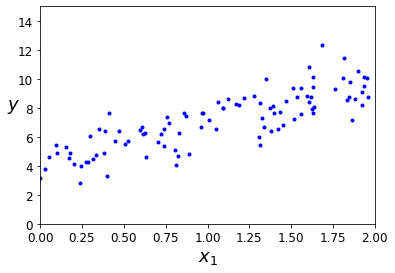

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])

plt.show()

製作的資料的函數式 $y = 4 + 3x_1$ + 高斯（Gaussian）雜訊

用正規方程式來計算 $ $

使用 Numpy 的線性代數模組（np.linalg）的 inv( ) 函式來計算逆矩陣，並使用 dot( ) 來做矩陣乘法

In [4]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.13281276],
       [2.82410028]])

3.8 -> 4, 3.2 -> 3

用 $\hat{\theta}$ 來進行預測

In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]   # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.13281276],
       [9.78101333]])

畫出這個模型的預測

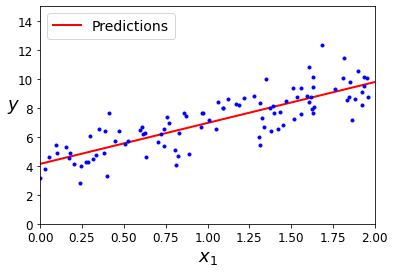

In [7]:
plt.plot(X_new, y_predict, "r-", linewidth = 2, label = "Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([0, 2, 0, 15])

plt.show()

使用 Scikit-Learn 來執行線性回歸

In [9]:
from sklearn.linear_model import LinearRegression

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [10]:
lin_reg.intercept_, lin_reg.coef_

(array([4.13281276]), array([[2.82410028]]))

In [11]:
lin_reg.predict(X_new)

array([[4.13281276],
       [9.78101333]])

LinearRegression 類別以 scipy.linalg.lstsq() 為基礎（名字代表“least squares“（最小平方）），可直接呼叫

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [12]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.13281276],
       [2.82410028]])

這函式計算 $\mathbf{X}^+\mathbf{y}$，其中 $\mathbf{X}^{+}$ 是 $\mathbf{X}$ 的擬似逆推（*pseudoinverse*） (是 Moore-Penrose inverse)。可使用 np.linalg.pinv() 來計算擬似逆推

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [13]:
np.linalg.pinv(X_b).dot(y)

array([[4.13281276],
       [2.82410028]])

擬似逆推是用一種稱為**奇異值分解（Singular Value Decomposition，SVD）** 的標準矩陣分解技術來計算的

將訓練組矩陣 $X$ 分解成三個矩陣 $U$ $\Sigma$ $V^T$（可參閱 numpy.linalg.svd()）

算出的擬似逆推是 $\mathbf{X}^{+} = V\Sigma^+U^T$

## 計算複雜度

當特徵數量變得很大時，正規方程式與 SVD 技術都會變得很慢。它們都與訓練組的實例（instance）成線性關係（$O(m)$)，因此當記憶體可以容納訓練組時，可有效地處理大型訓練集

# 梯度下降

梯度下降（Gradient Descent）是一種通用的優化演算法。適合特徵太多，或訓練實例太多而無法放進記憶體的情況

透過反覆調整參數來將代價函數最小化

線性回歸模型的 MSE 代價函數剛好是凸函數（onvex function），當選擇曲線上的任何兩點畫一條線時，該線絕對不會穿越曲線，代表曲線沒有局部最小值，只有全域最小值。也是個斜率不會突然改變的連續函數

當使用 Gradient 時，應確保所有特徵都有相似的尺度（如使用 Scikit-learning 的 StandardScaler），否則收斂的時間會長很多

## 批次梯度下降 Batch gradient descent

代價函數的偏導數

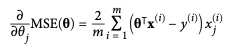

代價函數的梯度向量

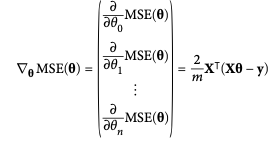

In [14]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

In [15]:
theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [16]:
theta

array([[4.13281276],
       [2.82410028]])

In [17]:
X_new_b.dot(theta)

array([[4.13281276],
       [9.78101333]])

In [18]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize = 18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize = 16)

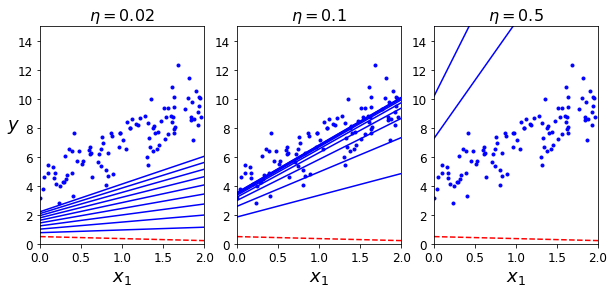

In [19]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize = (10, 4))
plt.subplot(131); plot_gradient_descent(theta, eta = 0.02)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(132); plot_gradient_descent(theta, eta = 0.1, theta_path = theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta = 0.5)

plt.show()

To find a good learning rate, you can use grid search (see Chapter 2). However, you may want to limit the number of iterations so that grid search can eliminate models that take too long to converge.

You may wonder how to set the number of iterations. If it is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will waste time while the model parameters do not change anymore. A simple solu‐ tion is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number *ε* (called the tolerance)—because this happens when Gradient Descent has (almost) reached the minimum.

## 隨機梯度下降 Stochastic Gradient Descent¶

批次梯度下降的主要問題是在每一個步驟都使用整個順練組來計算梯度，若當訓練組很大時，速度就十分緩慢

隨機梯度下降（Stochastic Gradient Descent）會在每一個步驟從訓練組隨機挑選出一個實例，並只用那一個實例來計算梯度

隨機梯度下降找到全域最小值的機率大於批次梯度下降

有個壞處是演算法永遠不會停在最小值，有個解決的方法，就是逐漸降低學習速度。一開始使用很大的步幅（有助於快速推進並逃離局部最小值），接著越來越小，讓演算法停在全域最小值。這個程序類似*退火（annealing）模擬*。在每次迭代時決定學習速度的函數稱為**學習排程（learning schedule）**

In [20]:
m = len(X_b)

np.random.seed(42)

In [21]:
n_epochs = 50
t0, t1 = 5, 50  # 學習排程超參數 learning schedule hyperparameters

In [22]:
def learning_schedule(t):
    return t0 / (t + t1)

In [23]:
theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):       
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [24]:
theta

array([[4.15234747],
       [2.83154485]])

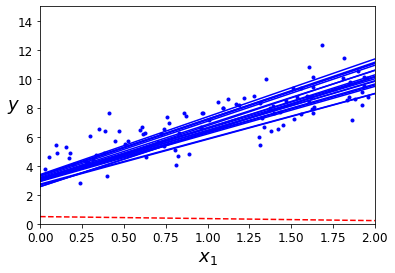

In [25]:
theta_path_sgd = []
m = len(X_b)

np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown in the book
            style = "b-" if i > 0 else "r--"         # not shown in the book
            plt.plot(X_new, y_predict, style)        # not shown in the book
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown in the book

plt.plot(X, y, "b.")                                 # not shown in the book
plt.xlabel("$x_1$", fontsize = 18)                   # not shown in the book
plt.ylabel("$y$", rotation = 0, fontsize = 18)       # not shown in the book
plt.axis([0, 2, 0, 15])                              # not shown in the book

plt.show()                                           # not shown in the book

因為實例是隨機選出，有些實例可能被各個 epoch 選出多次，有些則完全未被選出，若想確保演算法在每一個 epoch 遍歷每一個實例，可洗亂訓練組（務必一起洗亂輸入特徵與標籤），再逐一歷遍每個實例，接著在洗亂它，以此類堆，但這樣收斂的速度通常很慢

使用隨機梯度下降時，訓練實例必須是獨立同分佈的（independent and identically distributed，HD），以確保平均而言，參數會被牽引至全域最小值。要確保這件事，簡單的做法是在訓練期間洗亂實例（如隨機選出各個實例，或是在每個 epoch 開始時洗亂訓練組）

在 Scikit-Learn 可使用 SGDRegressor 以隨機 GD 執行線性回歸，預設優化平方誤差代價函數

In [18]:
from sklearn.linear_model import SGDRegressor

In [27]:
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1, random_state = 42)  
# 最多執行 1000 epoch，或是一個 epoch 期間，loss降至小於 0.001為止（max_iter = 1000, tol = 1e-3）
# 不使用任何正則化（penalty = None），最初的學習速度是0.1（eta0 = 0.1）
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [28]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.05279987]), array([2.81782544]))

## 小批次梯度下降 Mini-batch gradient descent

小批次梯度下降在每一步是用隨機的一小組實例（稱為*小批次（mini-batches）*）來計算梯度，小批次 GD 優於隨機 GD 主要的是可用矩陣運算優化硬體來提升性能，特別是使用 GPU

In [29]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

In [30]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

In [31]:
t0, t1 = 200, 1000

In [32]:
def learning_schedule(t):
    return t0 / (t + t1)

In [33]:
t = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i + minibatch_size]
        yi = y_shuffled[i:i + minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [34]:
theta

array([[4.21195479],
       [2.91290289]])

In [35]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

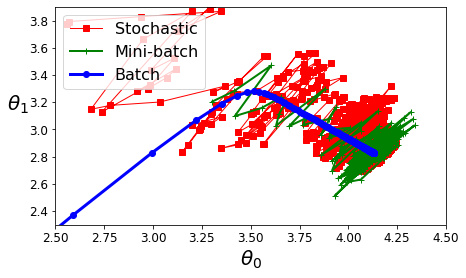

In [36]:
plt.figure(figsize = (7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth = 1, label = "Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth = 2, label = "Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth = 3, label = "Batch")
plt.legend(loc="upper left", fontsize = 16)
plt.xlabel(r"$\theta_0$", fontsize = 20)
plt.ylabel(r"$\theta_1$   ", fontsize = 20, rotation = 0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()

# 多項式回歸 Polynomial regression

可用線型模型來擬合非線性資料，一種簡單的做法是加入各個特徵的次方來作為新特徵，接著用這個擴展後的特徵組合來訓練線型模型。這種技術稱為**多項式回歸（Polynomial regression）**

In [37]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

使用簡單的二次方程式再加上高斯雜訊，產生一些非線性資料

此例子中只有一個特徵

In [38]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

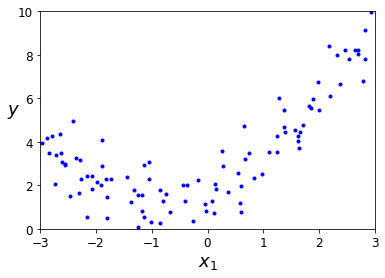

In [40]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([-3, 3, 0, 10])

plt.show()

由於直線無法擬合這筆資料，所以用 Scikit-Learn 的 PolynomialFeatures 來轉換資料，在訓練組內加入各個特徵的平方（二次多項是）作為新特徵

In [13]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)

In [47]:
X[0]

array([-0.75275929])

X_poly 內有原始的 X 特徵，以及該特徵的平方

In [43]:
X_poly[0]

array([-0.75275929,  0.56664654])

使用 LinearRegreesion 來擬合這個擴展過的訓練資料

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

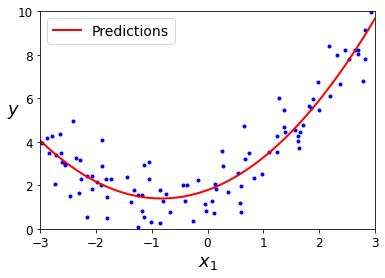

In [45]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth = 2, label = "Predictions")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([-3, 3, 0, 10])

plt.show()

原始的函數

$\hat{y} = 0.5x_1^2 + 1.0x_1 + 2.0 + 高斯雜訊$

模型估計

$\hat{y} = 0.56x_1^2 + 0.93x_1 + 1.78$

當特徵有多個時，多項式回歸或許可以找出特徵間的關係，因為 PolynomialFeatures 也會加入所設定的 degree 之前的每一個特徵組合。例如有兩個特徵 a 與 b，degree = 3 的 PolynomialFeatures 不但會加入特徵 a^2, a^3, b^2, b^3，也會加入 ab, a^2b 與 ab^2 等組合

PolynomialFeatures(degree = d) 會將一個含有 n 個特徵的陣列轉換成一個含有 (n+d)!/d!n! 個特徵的陣列，其中 n! 是 n 的階乘。所以要小心特徵組合數量爆炸

# 學習曲線 Learning Curves

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

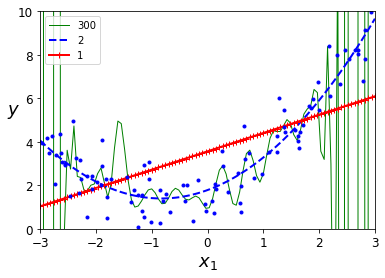

In [49]:
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree = degree, include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label = str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth = 3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([-3, 3, 0, 10])

plt.show()

上圖的結果顯示高次多項式回歸模型嚴重過擬訓練資料，線性模型則欠擬，只有二次模型是表現較好

可使用交叉驗證來估計模型的類推效果，根據交叉驗證評估結果，模型處理訓練資料的能力很好，但類推能力很差，就顯示模型過擬了，如果處理兩者的效果都很差，就表示模型欠擬，這是了解模型究竟是太簡單還是太複雜的一種方法

另一種方法是查看**學習曲線（learning curves）**，是指出模型處理訓練組與驗證組的效果，和訓練組的大小（或訓練迭代）之間關係的圖表

要畫出該圖，要用各種大小的訓練子集合來訓練模型

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [51]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "val")
    plt.legend(loc="upper right", fontsize = 14)   # not shown in the book
    plt.xlabel("Training set size", fontsize = 14) # not shown in the book
    plt.ylabel("RMSE", fontsize = 14)              # not shown in the book

檢視一般線性回歸模型的學習曲線

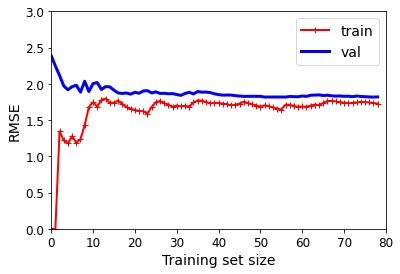

In [52]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book

plt.show()   

上圖學習曲線是典型欠擬的模型曲線，這兩條曲線都到達一個高原，彼此很接近，且很高

如果模型欠擬訓練資料，加入更多訓練樣本是於事無補的。必須使用更複雜的模型，或找出更好的特徵

使用 10 次多項式模型來處理同一組資料的學習曲線

In [11]:
from sklearn.pipeline import Pipeline

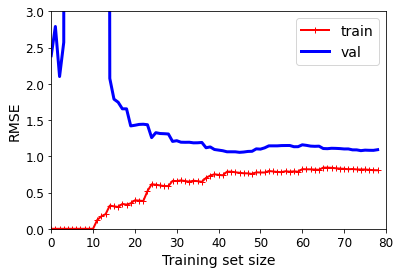

In [55]:
polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree = 10, include_bias = False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown

plt.show()                        # not shown

上圖在處理訓練資料的誤差比線性回歸模型小很多

兩曲線間有一段距離，表這個模型處理訓練資料的效果比驗證資料好非常多，這是過擬模型的特徵。但如果使用大很多的訓練組，這兩條曲線會持續靠近

有一種改善過擬模型的方法，就是餵更多的訓練資料，直到驗證誤差與訓練誤差碰在一起為止

模型的類推誤差可用三個非常不同的誤差之和來表示：
- 偏差（bias）:這是由錯誤的假設所造成的。當模型有高偏差時，很有可能欠擬訓練資料
- 變異度（variance）:這是模型對訓練資料的微小變化過度敏感造成的。自由度較多的模型（如高次多項式模型）可能有高變異度，因此過擬訓練資料
- 不可還原誤差（irreducible error）:這是資料本恩的雜訊造成的，這部分的誤差只能藉由清理資料來降低

增加模型的複雜度通常會增加其變異度，且減少偏差，反過來說，減少模型的複雜度會增加其偏差，減少變異度。這就是為何被稱為權衡（trade-off）

# 含正則化的線性模型 Regularized models

將模型正則化（也就是約束它）是降低過擬的好方法，其自由度越少，就越難過擬資料，要將多項式模型正則化，有一種簡單的做法是降低多項式次數（degree）

對線性模型而言，正則化的做法通常是約束模型的權重

有三種不同權重的約束方式
- 山嶺回歸 Ridge Regression
- Lasso回歸 Lasso Regression
- 彈性網路 Elastic Net

## 山嶺回歸 Ridge Regression

山嶺回歸(Ridge Regression)也稱為 Tikhonow 正則化，是線性回歸的正則化版本，在代價函式中加入一個等於 $\alpha\sum_{i=1}^{m}\theta^2_i $ 的正則化項

超參數 $\alpha$ 控制將模型正則化的程度。如果 $\alpha=0$ 山嶺回歸就是現行回歸。如果 $\alpha$ 很大，所有權著最終都非常接近零，變成一個穿越資料均值的直線 


執行山嶺回歸之前務必縮份資料，因為對輸入特徵的尺度非常敏感。對多數正則化的模型而言都是如此

In [2]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [3]:
from sklearn.linear_model import Ridge

In [6]:
def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth = lw, label = r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth = 3)
    plt.legend(loc = "upper left", fontsize = 15)
    plt.xlabel("$x_1$", fontsize = 18)
    plt.axis([0, 3, 0, 4])

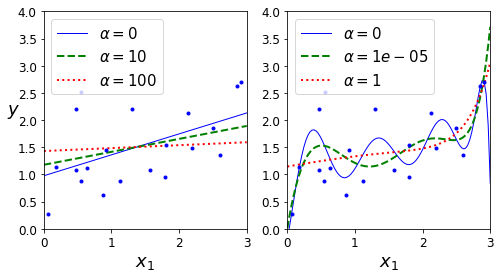

In [16]:
plt.figure(figsize = (8,4))
plt.subplot(121)
plot_model(Ridge, polynomial = False, alphas = (0, 10, 100), random_state = 42)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(122)
plot_model(Ridge, polynomial = True, alphas = (0, 10 ** -5, 1), random_state = 42)

plt.show()

In [4]:
ridge_reg = Ridge(alpha = 1, solver = "cholesky", random_state = 42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [19]:
sgd_reg = SGDRegressor(penalty = "l2", random_state = 42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [5]:
ridge_reg = Ridge(alpha = 1, solver = "sag", random_state = 42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

In [20]:
sgd_reg = SGDRegressor(penalty = "l2", max_iter = 1000, tol = 1e-3, random_state = 42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## Lasso回歸 Lasso Regression

In [21]:
from sklearn.linear_model import Lasso

/Users/jasonch/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


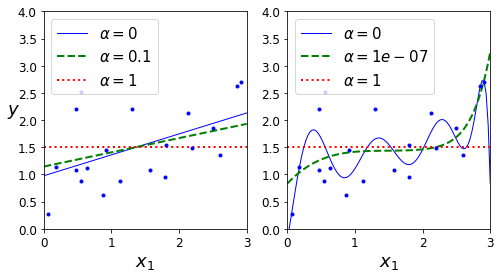

In [22]:
plt.figure(figsize = (8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial = False, alphas = (0, 0.1, 1), random_state = 42)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas = (0, 10**-7, 1), random_state = 42)

plt.show()

Lasso VS. Ridge Plot

In [68]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [72]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord = 1, axis = 1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord = 2, axis = 1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

In [73]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    
    return np.array(path)

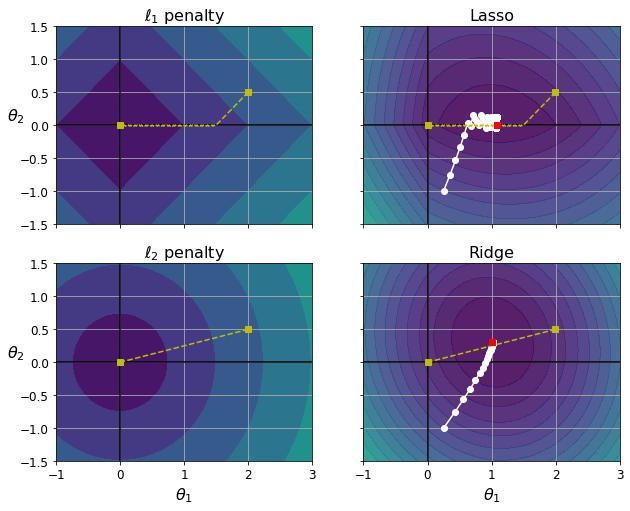

In [74]:
fig, axes = plt.subplots(2, 2, sharex = True, sharey = True, figsize = (10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN = np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1 = 0, l2 = 0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y = 0, color = 'k')
    ax.axvline(x = 0, color = 'k')
    ax.contourf(t1, t2, N / 2., levels = levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize = 16)
    ax.axis([t1a, t1b, t2a, t2b])
    
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize = 16)
    ax.set_ylabel(r"$\theta_2$", fontsize = 16, rotation = 0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y = 0, color = 'k')
    ax.axvline(x = 0, color = 'k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha = 0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize = 16)
    ax.axis([t1a, t1b, t2a, t2b])
    
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=  16)

plt.show()

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

## 彈性網路 Elastic Net

彈性網路（Elastic Net）介於 Ridge 回歸與 Lass 回歸之間，其正則化項單純只是 Ridge 與 Lasso 的正則化項的混合，可控制混和比率 r 。當 r=0 時，彈性網路相當於 Ridge 回歸，當 r=1 時，則相當於 Lasso 回歸

In [65]:
from sklearn.linear_model import ElasticNet

In [66]:
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5, random_state = 42)   # l1_ratio 是混合比率 r
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

何時該使用一般線性回歸、Ridge、Lasso、Elastic Net？做一些正則化幾乎都錯不了，通常避免使用一般的線性回歸。Ridge 是很好的預選方案，但如果只有少數特徵是有用的，就要選擇 Lasso 或 Elastic Net，因為它們傾向將無用的特徵權重降為0，一般來說，Elastic Net 優於 Lasso，因為當特徵數量大於訓練實例數量，或有些特徵有緊密關聯時，Lasso 可能有不穩定的表現

## 提前停止 Early stopping

將梯度下降這種迭代學習演算法正則化，在驗證誤差到達一個最小值時，立刻停止訓練，這種作法稱為**提前停止（early stopping）**

使用隨機與小批次梯度下降時，曲線不那麼平滑，所以可能難以知道是否達到最小值，其中一種解決方法就是在驗證誤差大於最小值一段時間之後停止，接著將模型參數恢復成驗證誤差最小時的值

In [56]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X ** 2 + np.random.randn(m, 1)

In [57]:
X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size = 0.5, random_state = 10)

提前停止的基本做法

In [58]:
from sklearn.base import clone

In [59]:
# 準備資料
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree = 90, include_bias = False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [60]:
sgd_reg = SGDRegressor(max_iter = 1, tol =- np.infty, warm_start = True,
                       penalty = None, learning_rate = "constant", eta0 = 0.0005, random_state = 42)
# warm_start = True 時，當呼叫 fit()時，會在之前停止的地方繼續訓練，而非從頭開始

In [61]:
minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 在之前停止的地方繼續
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [64]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

繪圖

In [62]:
sgd_reg = SGDRegressor(max_iter = 1, tol =- np.infty, warm_start = True,
                       penalty = None, learning_rate = "constant", eta0 = 0.0005, random_state = 42)

n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

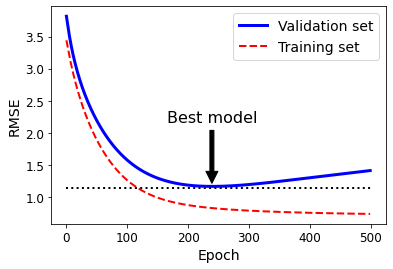

In [63]:
plt.annotate('Best model',
             xy = (best_epoch, best_val_rmse),
             xytext = (best_epoch, best_val_rmse + 1),
             ha = "center",
             arrowprops = dict(facecolor='black', shrink = 0.05),
             fontsize = 16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth = 2)
plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label = "Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth = 2, label = "Training set")
plt.legend(loc="upper right", fontsize = 14)
plt.xlabel("Epoch", fontsize = 14)
plt.ylabel("RMSE", fontsize = 14)

plt.show()

# Logistic 回歸 Logistic Regression

Logistic 回歸 （也稱為 Logit 回歸）經常被用來估計一個實例屬於特定類別的機率

如果估計出來的機率大於 50%，模型就預測該實例屬於該類別（稱為陽性類別，標為「1」），否則就預測它不屬於該類別（也就是屬於陰性類別，標為「0」），所以是一種二元分類器

## 估計機率

同線性回歸一樣，會計算輸入特徵的加權總和（加上一個偏差項），但不像線性回歸模型那樣直接輸出結果，而是輸出該結果的 logistic

Logistic 回歸模型估計的機率（向量型式）

$\hat{p} = h_\theta(x) = \sigma(x^T\theta)$

logistic（以$\sigma(.)$來表示）是個 sigmoid（也就是 S 形的）函數，輸出的數字介於 0 和 1 之間

Logistic 函數

$\sigma(t) = \frac{1}{1 + exp(-t)}$

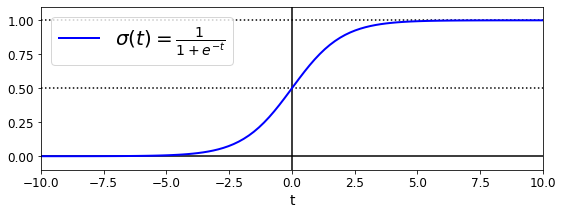

In [75]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth = 2, label = r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize = 20)
plt.axis([-10, 10, -0.1, 1.1])

plt.show()

當 Logistic 回歸模型估計實例 x 屬於陽性類別的機率 $\hat{p} = h_\theta(x)$ 時，就可以進行預測 $\hat{y}$

Logistic 回歸模型預測

$ \hat{y} = \begin{cases} 0 & \text {if $\hat{p}$ < 0.5}  \\ 1 & \text{if $\hat{p} >= 0.5$} \end{cases} $

當 t<0 時，$\sigma(t) < 0.5$，當 t>= 0 時，$\sigma(t) >= 0.5$，所以 Logistic 回歸模型會在 $x^T\theta$ 是陽性時預測1，當它是陰性時則為 0

## 訓練與代價函數

## 決策邊界

建立一個分類器，只根據花瓣寬度特徵來偵測 Iris virginica 品種

In [76]:
from sklearn import datasets

In [77]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [78]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [79]:
X = iris["data"][:, 3:]  # petal width 花瓣寬度
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

<ipython-input-79-5be2c934dd40>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0


In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
log_reg = LogisticRegression(solver = "lbfgs", random_state = 42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

檢視模型估計花瓣寬度從 0cm 到 3cm 的花朵其機率

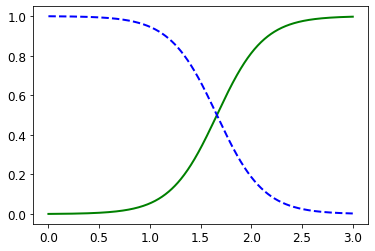

In [83]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth = 2, label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth = 2, label = "Not Iris virginica")

加入更多 Matplotlib 程式，讓圖形更漂亮

/Users/jasonch/opt/anaconda3/lib/python3.8/site-packages/matplotlib/patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  verts = np.dot(coords, M) + (x + dx, y + dy)


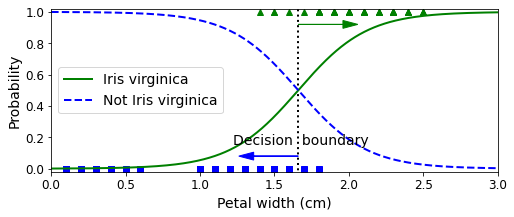

In [85]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)      # 若要直接預測類別，使用 predict()
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize = (8, 3))
plt.plot(X[y == 0], y[y == 0], "bs")
plt.plot(X[y == 1], y[y == 1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth = 2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth = 2, label = "Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth = 2, label = "Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize = 14, color = "k", ha = "center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width = 0.05, head_length = 0.1, fc='b', ec = 'b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width = 0.05, head_length = 0.1, fc = 'g', ec = 'g')
plt.xlabel("Petal width (cm)", fontsize = 14)
plt.ylabel("Probability", fontsize = 14)
plt.legend(loc = "center left", fontsize = 14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

In [86]:
decision_boundary

array([1.66066066])

In [87]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

線性決策邊界

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

<ipython-input-89-049720a72dfc>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


In [91]:
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, random_state=42)

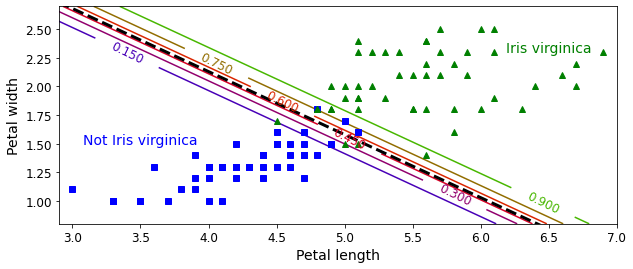

In [92]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize = (10, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap = plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize = 12)
plt.plot(left_right, boundary, "k--", linewidth = 3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize = 14, color = "b", ha = "center")
plt.text(6.5, 2.3, "Iris virginica", fontsize = 14, color = "g", ha = "center")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

In [93]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

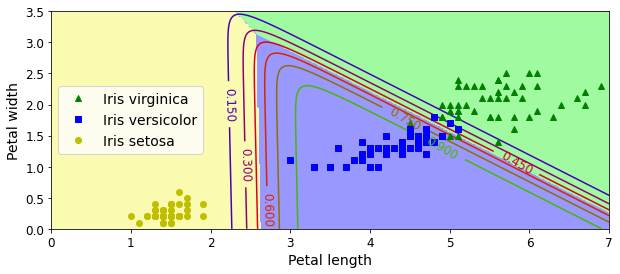

In [94]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

In [95]:
softmax_reg.predict([[5, 2]])

array([2])

In [96]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

實作批次梯度下降，並使用提前停止的 Softmax 回歸

12. Batch Gradient Descent with early stopping for Softmax Regression

(without using Scikit-Learn)

Let's start by loading the data. We will just reuse the Iris dataset we loaded earlier.

In [67]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

We need to add the bias term for every instance ($x_0 = 1$):

In [68]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

And let's set the random seed so the output of this exercise solution is reproducible:

In [69]:
np.random.seed(2042)

The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's `train_test_split()` function, but the point of this exercise is to try understand the algorithms by implementing them manually. So here is one possible implementation:

In [70]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [71]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Let's test this function on the first 10 instances:

In [72]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [73]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

Looks good, so let's create the target class probabilities matrix for the training set and the test set:

In [74]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [75]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

We are almost ready to start training. Let's define the number of inputs and outputs:

In [76]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

Now here comes the hardest part: training! Theoretically, it's simple: it's just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it's easy to mix up the order of the terms, or the indices. You can even end up with code that looks like it's working but is actually not computing exactly the right thing. When unsure, you should write down the shape of each term in the equation and make sure the corresponding terms in your code match closely. It can also help to evaluate each term independently and print them out. The good news it that you won't have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help you understand what's going on under the hood.

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [77]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693313
2000 0.5444496861981873
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.4482424418895776
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


And that's it! The Softmax model is trained. Let's look at the model parameters:

In [78]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

Let's make predictions for the validation set and check the accuracy score:

In [79]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Well, this model looks pretty good. For the sake of the exercise, let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of `Theta` since this corresponds to the bias term). Also, let's try increasing the learning rate `eta`.

In [80]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629505
1000 0.503640075014894
1500 0.49468910594603216
2000 0.4912968418075477
2500 0.489899247009333
3000 0.48929905984511984
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


Because of the additional $\ell_2$ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [81]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Cool, perfect accuracy! We probably just got lucky with this validation set, but still, it's pleasant.

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [82]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109127
1500 0.5355752782580262
2000 0.5331959249285544
2500 0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327977 early stopping!


In [83]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Still perfect, but faster.

Now let's plot the model's predictions on the whole dataset:

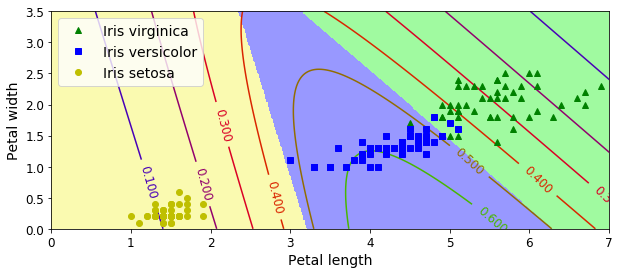

In [84]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

And now let's measure the final model's accuracy on the test set:

In [85]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

Our perfect model turns out to have slight imperfections. This variability is likely due to the very small size of the dataset: depending on how you sample the training set, validation set and the test set, you can get quite different results. Try changing the random seed and running the code again a few times, you will see that the results will vary.